In [205]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [315]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker
from mtdnetwork.actions import ActionManager
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

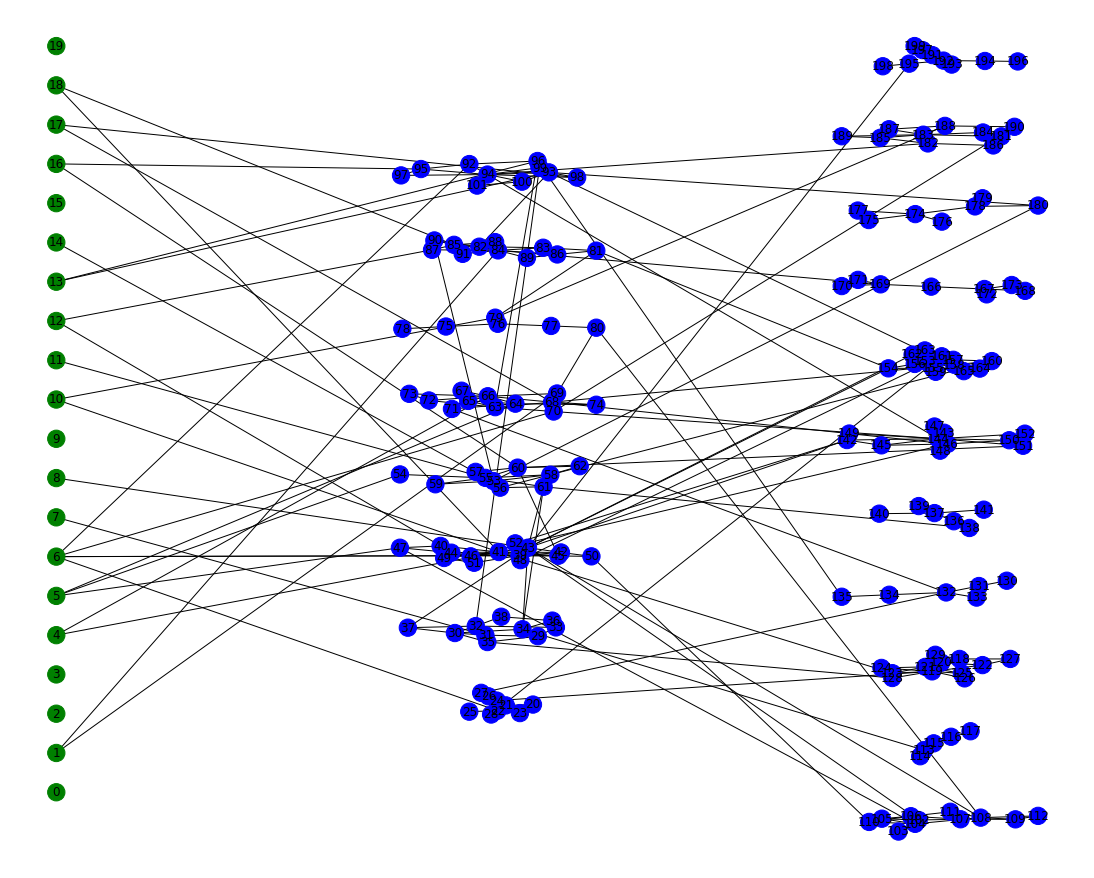

In [316]:
test_network = network.Network(200, 20, 20, 3)
# test_network.register_mtd(PortShuffle)
# test_network.register_mtd(IPShuffle)
test_network.draw()

In [317]:
adversary = hacker.Hacker(test_network)

In [318]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    test_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
    
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:10:ubuntu:20.04
INFO:vuln-357d4fbe-c512-411b-8b8a-c1b344c4d6fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdne

DONE
TIME: 199999


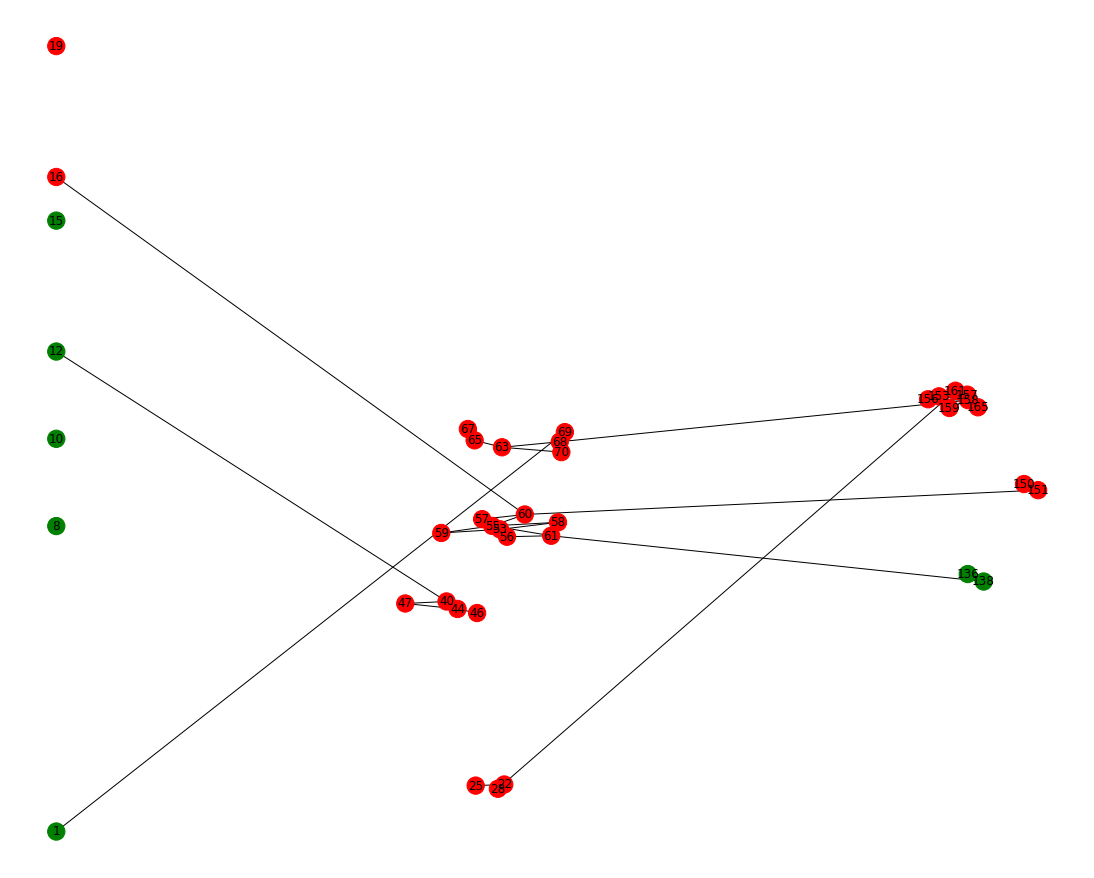

In [319]:
test_network.draw_compromised(adversary.compromised_hosts)

In [320]:
adversary.get_statistics()

{'Total Host Compromises': 39,
 'Total User Compromises': 51,
 'Total Vuln Compromises': 24,
 'Total Reuse Pass Compromises': 11,
 'Total Password Spray Compromises': 4,
 'Total Actions Blocked by MTD': 0}

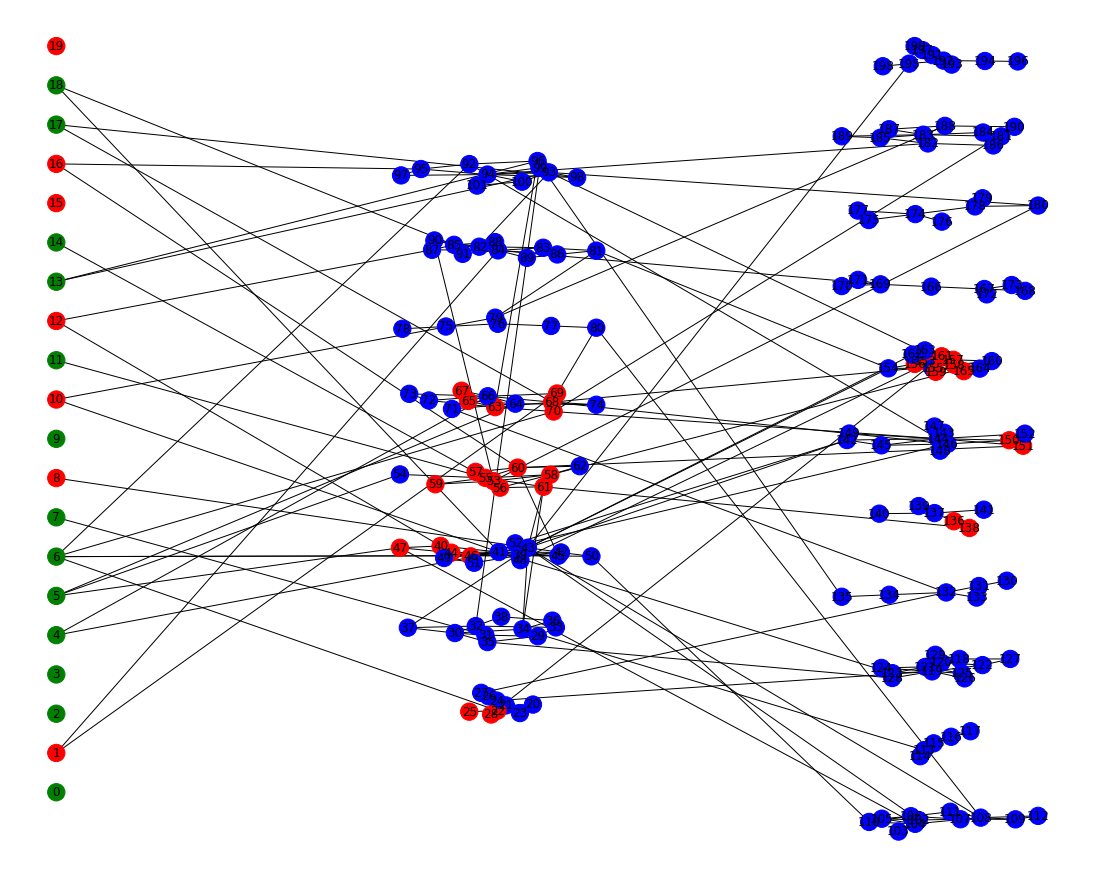

In [321]:
test_network.draw()

In [314]:
adversary.observed_changes

{}